In [1]:
from sklearn.datasets import fetch_20newsgroups
from io import StringIO
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk, RegexpParser, ngrams
from nltk.corpus import wordnet, stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import os
from sklearn.metrics import homogeneity_score, v_measure_score
from sklearn.cluster import KMeans, MiniBatchKMeans
from IPython.display import display
from nltk.chunk.regexp import ChunkString, ChunkRule, ChinkRule
from nltk.tree import Tree
from nltk.chunk import RegexpChunkParser
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
#LOAD DATA FROM FILES

def loadData(categories):
    data = []
    for category in categories:
        files = ["20_newsgroups/" + category +"/" + x for x in os.listdir("20_newsgroups/" + category)]
        count=0
        for i in files:
            with open(i, mode='r', encoding='utf-8', errors='ignore') as file:
                ok = False
                text = file.read()
                if len(text) > 6000:
                    ok = True
                if ok:
                    data.append([text, category])
                    count += 1
            if count == 10:
                break

                
    
    
    return data

In [3]:
#FUNCTION TO REMOVE NOISE

def noiseremoval(text):
    textstream = StringIO(text)
    while not "Lines" in textstream.readline():
        pass
    text = textstream.read()
   #text = re.sub('(---*)|>|<|#', '',text)
    text = re.sub(r'(\w)-(\w)', r'\g<1>\g<2>', text)
    text = re.sub('[^A-Za-z]', ' ', text)
    text = re.sub('\n|\t', ' ', text)
    text = re.sub('\ +', ' ', text)
   #print(text[1])
    return text

In [4]:
#TOKENIZE DATA

def tokenize(text):
    words = word_tokenize(text)
    cleaned_words = list()
    for i in words:
        w = i.strip()
        if(len(w)>1):
            cleaned_words.append(w.lower())
    #print(cleaned_words)
    return cleaned_words

In [5]:
#POS TAGGING

def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return None

In [6]:
#STEMMING AND LEMMATIZING

def stem_lemmatize_tagged(words_tagged):
        porter = PorterStemmer()
        lemmatizer = WordNetLemmatizer()
        words = words_tagged
        for i in range(len(words)):
            pos = get_wordnet_pos(words[i][1])
            if pos:
                words[i] = (lemmatizer.lemmatize(\
                                            porter.stem(words[i][0]), \
                                            pos=pos), words[i][1])
            else:
                words[i] = (lemmatizer.lemmatize(\
                                            porter.stem(words[i][0])), words[i][1])
        return words

In [7]:
#TEXT PREPROCESSING


data = loadData([
    'comp.graphics',    
    'alt.atheism',
    'sci.space'
    ])

In [8]:
#FUNCTION TO DO PREPROCESSING ON TEXT
#1.NOISE REMOVAL
#2.TOKENIZATION
#3.POS TAGGING
#4.NGRAMS
#5.STEMMING AND LEMMATIZATION
#6.REMOVING STOP WORDS

def process(data):

    print("\n\n\n NOISE REMOVED \n\n\n")
    noisefree=[]
    for i in range(len(data)):
        noisefree.append(noiseremoval(data[i][0]))
    print(noisefree[1])




    print("\n\n\n TOKENIZED \n\n\n")

    tokenized = []
    for i in range(len(noisefree)):
        tokenized.append(tokenize(noisefree[i]))

    for i in tokenized[1]:
        print(i)





    print("\n\n\n POS Tagged \n\n\n")


    pos_tagged = []
    for i in range(len(tokenized)):
        pos_tagged.append(pos_tag(tokenized[i]))
        #print(pos_tagged[i])
    for i in pos_tagged[1]:
         print(i[1], "\t", i[0])  





    print("\n\n\n Ngrams \n\n\n")        

    news_2_grams = []
    for i in range(len(tokenized)):
        news_2_grams.append(ngrams(tokenized[i], 2))

    for i in news_2_grams[1]:
        print(i)






    print("\n\n\n Stem lemmatied \n\n\n")

    stem_lemm = []
    for i in range(len(pos_tagged)):
        stem_lemm.append(stem_lemmatize_tagged(pos_tagged[i]))
    for i in stem_lemm[1]:
        print(i[0])






    print("\n\n\n Stop Word Removed \n\n\n")      

    stopWords = set(stopwords.words('english'))
    stopWordFree = []
    for i in range(len(stem_lemm)):
        removed = []
        for j in stem_lemm[i]:
            if len(j[0]) > 1 and j[0] not in stopWords:
                removed.append(j)
        stopWordFree.append(removed)
    for i in stopWordFree[1]:
        print(i[0])


    return stopWordFree




 NOISE REMOVED 



 I am not sure that I am supposed to post this mail here However during the last year while I was involved in developing graphical user interface GUI applications I have enjoyed being personally part of this news group wherin I got some interesting information which helped me in my work I am posting my resuming hoping that people working in my area would make time to look at it A WestGate Hall ISU Ames IA April Dear Prospective Employer I am seeking employment as a software engineer with interests in software design and development in which I can utilize my experience in hardware C C programming graphical user interface GUI operating systems and computer networking I received my Bachelors of Engineering BE degree in Electronics Engineering in and a M S degree in Electrical Engineering in Dec from Iowa State University Currently I am enrolled in a M S in Computer Engineering at Iowa State University During my Masters program as a research assistant since Jan I have

VBP 	 am
RB 	 not
JJ 	 sure
IN 	 that
VBP 	 am
VBN 	 supposed
TO 	 to
VB 	 post
DT 	 this
NN 	 mail
RB 	 here
RB 	 however
IN 	 during
DT 	 the
JJ 	 last
NN 	 year
IN 	 while
VBD 	 was
VBN 	 involved
IN 	 in
VBG 	 developing
JJ 	 graphical
NN 	 user
NN 	 interface
NN 	 gui
NNS 	 applications
VBP 	 have
VBN 	 enjoyed
VBG 	 being
RB 	 personally
NN 	 part
IN 	 of
DT 	 this
NN 	 news
NN 	 group
VBD 	 wherin
VBD 	 got
DT 	 some
JJ 	 interesting
NN 	 information
WDT 	 which
VBD 	 helped
PRP 	 me
IN 	 in
PRP$ 	 my
NN 	 work
VBP 	 am
VBG 	 posting
PRP$ 	 my
VBG 	 resuming
VBG 	 hoping
IN 	 that
NNS 	 people
VBG 	 working
IN 	 in
PRP$ 	 my
NN 	 area
MD 	 would
VB 	 make
NN 	 time
TO 	 to
VB 	 look
IN 	 at
PRP 	 it
VBP 	 westgate
JJ 	 hall
NN 	 isu
NNS 	 ames
VBP 	 ia
JJ 	 april
JJ 	 dear
JJ 	 prospective
NN 	 employer
VBP 	 am
VBG 	 seeking
NN 	 employment
IN 	 as
NN 	 software
NN 	 engineer
IN 	 with
NNS 	 interests
IN 	 in
NN 	 software
NN 	 design
CC 	 and
NN 	 development
IN 	 in
WDT 	 whi

('of', 'the')
('the', 'fork')
('fork', 'system')
('system', 'call')
('call', 'on')
('on', 'the')
('the', 'xinu')
('xinu', 'operating')
('operating', 'system')
('system', 'also')
('also', 'involved')
('involved', 'in')
('in', 'the')
('the', 'implementation')
('implementation', 'of')
('of', 'cpu')
('cpu', 'scheduling')
('scheduling', 'algorithm')
('algorithm', 'taking')
('taking', 'into')
('into', 'consideration')
('consideration', 'the')
('the', 'aging')
('aging', 'of')
('of', 'processes')
('processes', 'this')
('this', 'project')
('project', 'involved')
('involved', 'the')
('the', 'study')
('study', 'of')
('of', 'the')
('the', 'design')
('design', 'and')
('and', 'development')
('development', 'of')
('of', 'the')
('the', 'internals')
('internals', 'of')
('of', 'the')
('the', 'xinu')
('xinu', 'operating')
('operating', 'system')
('system', 'design')
('design', 'and')
('and', 'development')
('development', 'of')
('of', 'an')
('an', 'interrupt')
('interrupt', 'driven')
('driven', 'keyboard

be
not
sure
that
be
suppos
to
post
thi
mail
here
howev
dure
the
last
year
while
wa
involv
in
develop
graphic
user
interfac
gui
applic
have
enjoy
be
person
part
of
thi
news
group
wherin
get
some
interest
inform
which
help
me
in
my
work
be
post
my
resum
hope
that
peopl
work
in
my
area
would
make
time
to
look
at
it
westgat
hall
isu
ame
ia
april
dear
prospect
employ
be
seek
employ
a
softwar
engin
with
interest
in
softwar
design
and
develop
in
which
can
util
my
experi
in
hardwar
program
graphic
user
interfac
gui
oper
system
and
comput
network
receiv
my
bachelor
of
engin
be
degre
in
electron
engin
in
and
degre
in
electr
engin
in
dec
from
iowa
state
univers
current
be
enrol
in
in
comput
engin
at
iowa
state
univers
dure
my
master
program
a
research
assist
sinc
jan
have
publish
three
paper
includ
one
in
the
ieee
transact
on
magnet
these
paper
be
reflect
of
the
qualiti
of
my
research
and
my
abil
to
learn
new
concept
quickli
have
be
involv
in
mani
project
involv
softwar
develop
and
have
extens
ex

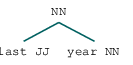

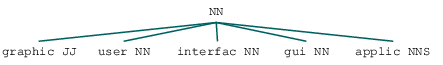

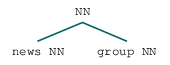

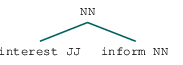

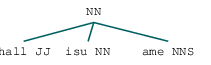

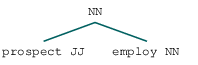

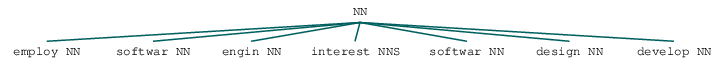

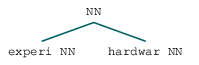

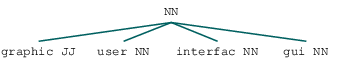

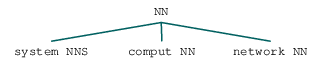

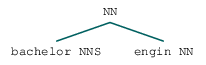

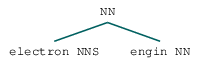

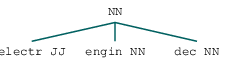

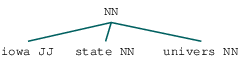

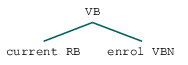

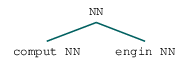

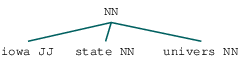

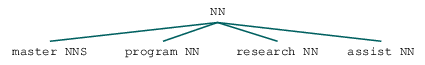

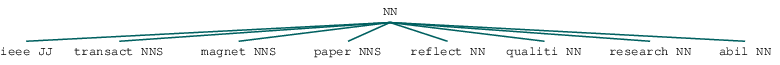

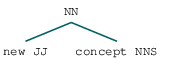

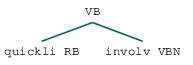

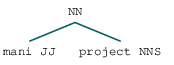

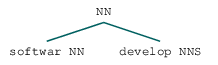

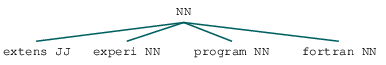

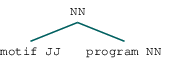

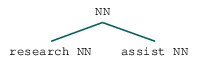

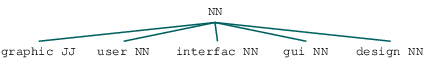

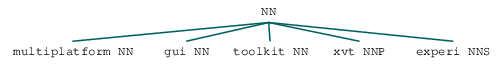

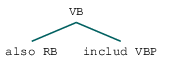

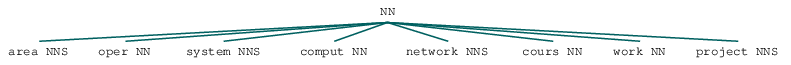

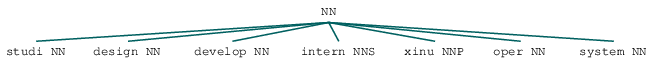

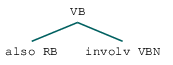

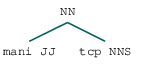

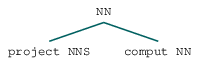

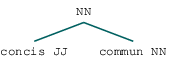

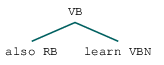

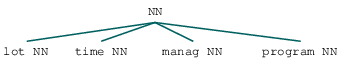

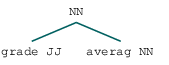

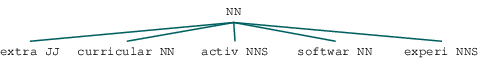

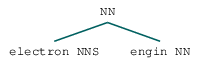

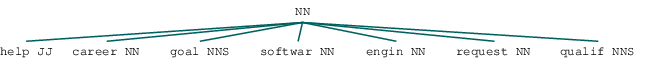

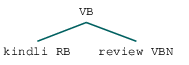

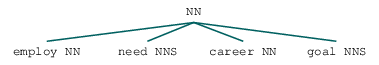

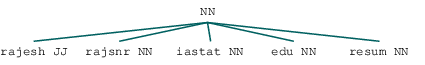

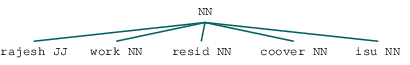

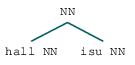

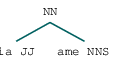

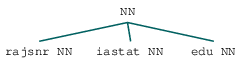

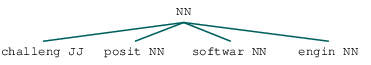

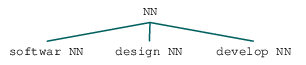

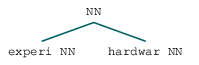

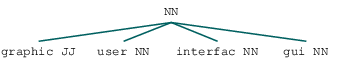

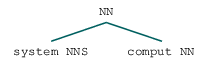

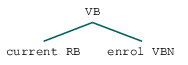

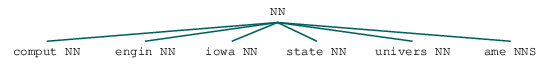

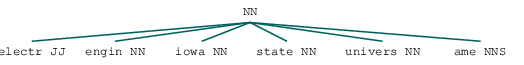

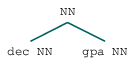

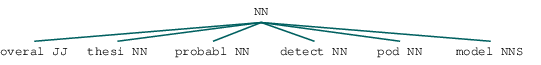

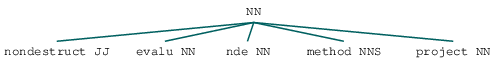

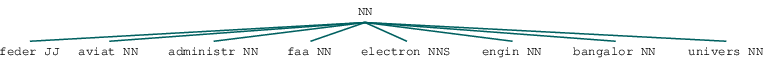

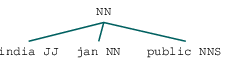

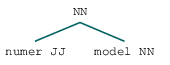

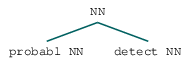

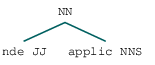

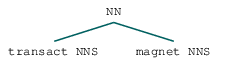

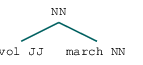

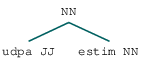

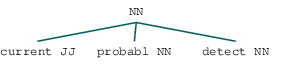

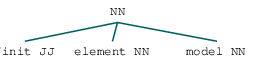

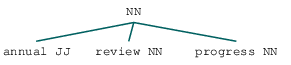

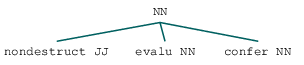

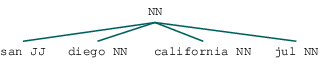

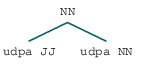

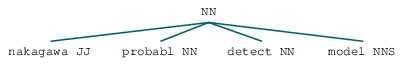

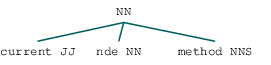

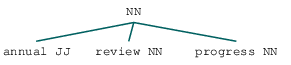

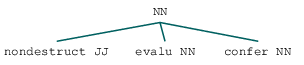

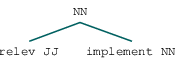

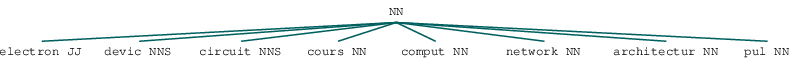

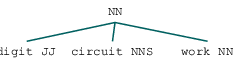

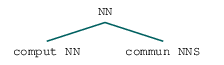

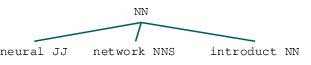

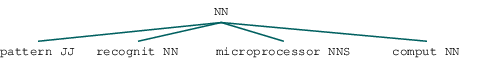

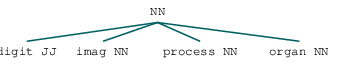

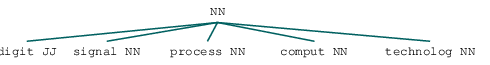

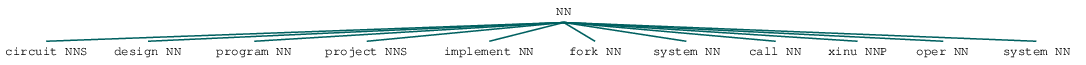

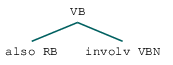

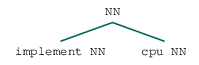

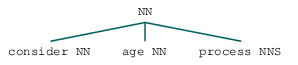

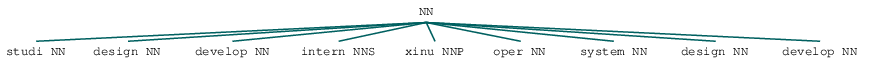

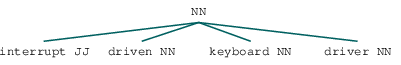

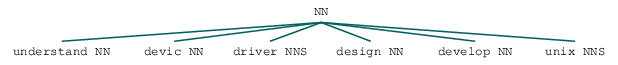

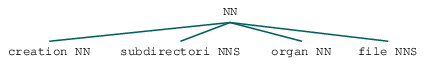

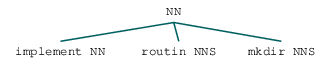

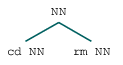

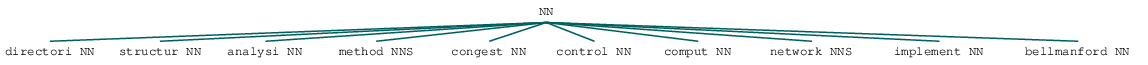

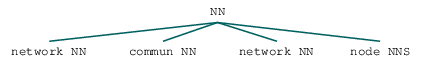

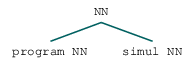

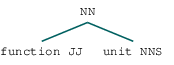

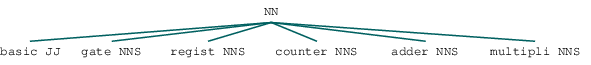

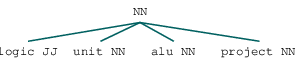

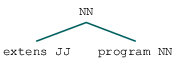

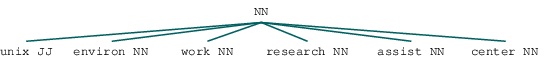

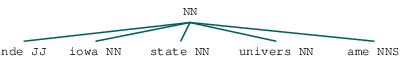

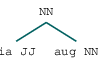

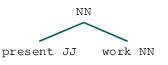

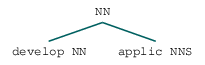

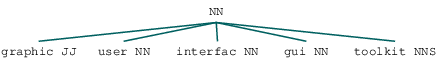

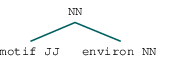

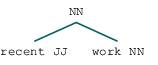

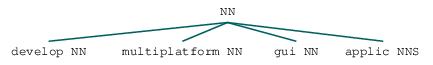

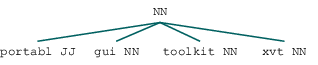

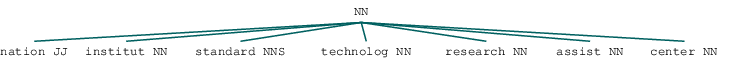

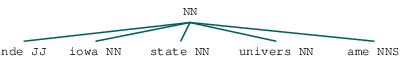

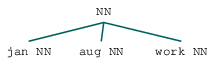

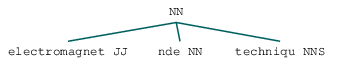

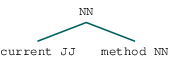

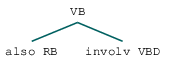

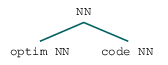

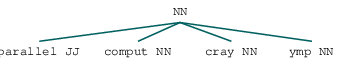

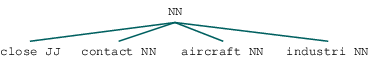

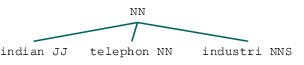

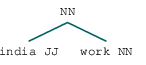

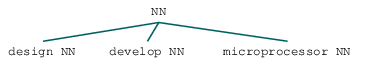

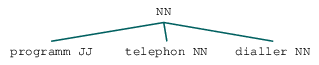

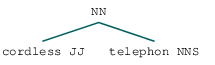

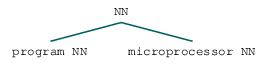

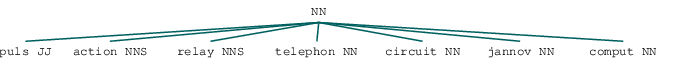

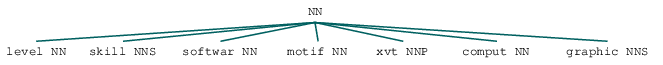

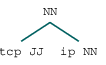

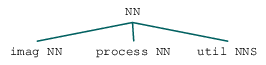

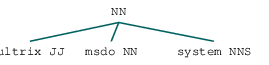

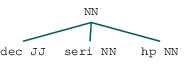

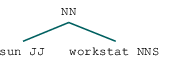

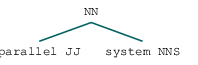

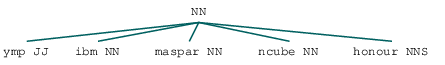

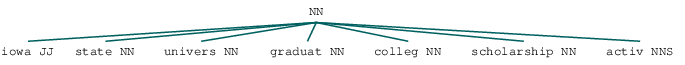

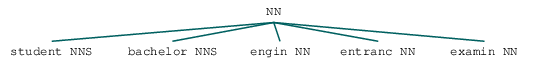

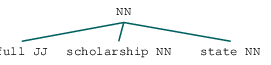

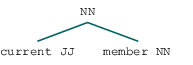

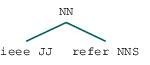

In [9]:
stopWordFree = process(data)


#CHUNKING OF STOP WORD FREE TEXT



print("\n\n\n Chunked \n\n\n")

chunked=[]
#tree = Tree('S', [x for x in stopWordFree[0]])
for i in range(len(stopWordFree)):
    tree = Tree('S', [x for x in stopWordFree[i]])
    reg = r"""
        NN: {<JJ.*><NN.*>+|<NN.*><NN.*>+}
        VB: {<RB.*><VB.*>}
        """
    parser = RegexpParser(reg)
    chunked.append(parser.parse(tree))
    
type_tree = type(Tree('S', []))
for chunk in chunked[1]:
    if(type(chunk) == type_tree):
        display(chunk)

        
        



In [10]:
cluster_data = loadData([
        'comp.sys.mac.hardware',
        'talk.politics.misc',
        'sci.space',
        'rec.sport.baseball',
        'rec.autos'
    ])
print(len(cluster_data))
labels = [x[1] for x in cluster_data]
news = [x[0] for x in cluster_data]

44


In [11]:
news_processed = process(cluster_data)




 NOISE REMOVED 



NNTPPostingHost carson u washington edu Here is how I modified my Quadra for higher speed Previously I had been using a Variable Speed Overdrive for accelerating my CPU but this modification is testing out as more stable at higher speeds Your mileage may vary The top speed you achieve cannot be predicted before hand My personal Q has tested fine up to mhz thus far I didn t have higher speed clock oscillators on hand to test higher speeds Parts Clock Oscillators pin TTL variety You will need a selection of speeds beginning at mhz on up The CPU will run at the oscillator speed The original one is a mhz unit I recommend getting a mhz clock in case you damage the existing one I obtained my clock oscillators from DigiKey for less than each Some of their part numbers are mhz TTL Clock Oscillator part X mhz TTL Clock Oscillator part X mhz TTL Clock Oscillator part CTX Don t get the half size clock oscillators They won t fit There are also CMOS clock oscillators I haven t

RB 	 nntppostinghost
JJ 	 carson
NN 	 washington
NN 	 edu
RB 	 here
VBZ 	 is
WRB 	 how
JJ 	 modified
PRP$ 	 my
NN 	 quadra
IN 	 for
JJR 	 higher
NN 	 speed
RB 	 previously
VBD 	 had
VBN 	 been
VBG 	 using
JJ 	 variable
NN 	 speed
NN 	 overdrive
IN 	 for
VBG 	 accelerating
PRP$ 	 my
NN 	 cpu
CC 	 but
DT 	 this
NN 	 modification
VBZ 	 is
VBG 	 testing
RP 	 out
IN 	 as
RBR 	 more
JJ 	 stable
IN 	 at
JJR 	 higher
NNS 	 speeds
PRP$ 	 your
NN 	 mileage
MD 	 may
VB 	 vary
DT 	 the
JJ 	 top
NN 	 speed
PRP 	 you
VBP 	 achieve
MD 	 can
RB 	 not
VB 	 be
VBN 	 predicted
IN 	 before
NN 	 hand
PRP$ 	 my
JJ 	 personal
VBZ 	 has
VBN 	 tested
JJ 	 fine
IN 	 up
TO 	 to
VB 	 mhz
RB 	 thus
RB 	 far
NNS 	 didn
VBP 	 have
JJR 	 higher
NN 	 speed
NN 	 clock
NNS 	 oscillators
IN 	 on
NN 	 hand
TO 	 to
VB 	 test
JJR 	 higher
NNS 	 speeds
NNS 	 parts
NN 	 clock
NNS 	 oscillators
VBP 	 pin
JJ 	 ttl
NN 	 variety
PRP 	 you
MD 	 will
VB 	 need
NN 	 selection
IN 	 of
NNS 	 speeds
VBG 	 beginning
IN 	 at
NN 	 mhz
IN 

VB 	 install
PRP$ 	 your
VBG 	 cooling
NN 	 fan
NN 	 system
TO 	 to
VB 	 complete
DT 	 the
NN 	 modification
VBZ 	 reinsert
DT 	 the
NN 	 motherboard
CC 	 and
VB 	 slide
PRP 	 it
IN 	 into
NN 	 place
NN 	 snap
IN 	 in
DT 	 the
JJ 	 interrupt
NN 	 switch
NN 	 assembly
CC 	 and
NN 	 speaker
TO 	 to
VB 	 lock
DT 	 the
JJS 	 mother
NN 	 board
RB 	 firmly
VBD 	 plug
DT 	 the
NN 	 speaker
NN 	 wire
RB 	 back
IN 	 into
DT 	 the
NN 	 motherboard
VBZ 	 reinstall
DT 	 the
NN 	 tower
NN 	 assembly
IN 	 by
JJ 	 first
VBG 	 placing
DT 	 the
JJ 	 right
NN 	 wall
IN 	 of
DT 	 the
NN 	 tower
IN 	 against
DT 	 the
JJ 	 right
NN 	 wall
IN 	 of
DT 	 the
NN 	 case
IN 	 with
DT 	 the
NN 	 tower
NN 	 assembly
IN 	 about
JJ 	 cm
NN 	 posterior
IN 	 of
PRP$ 	 its
VBN 	 intended
NN 	 position
RBR 	 lower
DT 	 the
NN 	 tower
NN 	 assembly
IN 	 into
NN 	 place
IN 	 while
VBG 	 maintaining
NN 	 contact
IN 	 with
DT 	 the
JJ 	 right
NN 	 wall
IN 	 of
DT 	 the
NN 	 case
RB 	 once
RB 	 fully
RP 	 down
RB 	 slide
DT 

nntppostinghost
carson
washington
edu
here
be
how
modifi
my
quadra
for
high
speed
previous
have
be
use
variabl
speed
overdr
for
acceler
my
cpu
but
thi
modif
be
test
out
a
more
stabl
at
high
speed
your
mileag
may
vari
the
top
speed
you
achiev
can
not
be
predict
befor
hand
my
person
ha
test
fine
up
to
mhz
thu
far
didn
have
high
speed
clock
oscil
on
hand
to
test
high
speed
part
clock
oscil
pin
ttl
varieti
you
will
need
select
of
speed
begin
at
mhz
on
up
the
cpu
will
run
at
the
oscil
speed
the
origin
one
be
mhz
unit
recommend
get
mhz
clock
in
case
you
damag
the
exist
one
obtain
my
clock
oscil
from
digikey
for
less
than
each
some
of
their
part
number
be
mhz
ttl
clock
oscil
part
mhz
ttl
clock
oscil
part
mhz
ttl
clock
oscil
part
ctx
don
get
the
half
size
clock
oscil
they
win
fit
there
be
also
cmo
clock
oscil
haven
tri
one
in
quadra
they
work
fine
in
iisi
socket
obtain
pin
socket
which
be
in
the
same
form
factor
a
pin
dip
packag
altern
use
machin
socket
pin
from
an
augat
style
socket
just
cut


In [12]:
news_processed_str = []
for i in range(len(news_processed)):
    tag_stripped = [x[0] for x in news_processed[i]]
    news_processed_str.append(' '.join(tag_stripped))
print(news_processed_str)

['sender faqserv gza com approv newsanswersrequest mit edu expir may gmt messageid macintosh generalfaq gza com replyto erh tesla njit edu elliott harold nntppostinghost padthai akti com summari thi document answer number frequent ask question macintosh usenet avoid wast bandwidth matter polit plea familiar thi document befor post keyword faq macintosh mac macintosh mac gener introduct xlastupd archivenam macintosh generalfaq version lastmodifi april copyright elliott harold chang ftp macintosh softwar ad ftp site anl anl fr bin hqx cpt imag etc disk doubler decod packit archiv binhex decod macbinari file stuffit file last version erron indic ad question get binhex stuffit etc pc comp sy mac faq part introduct macintosh newsgroup introduct use thi document inform avail newsgroup post someon ask whi system wa take sixteen megabyt iicx display knowledg world post seventeenth respons question ii ftp ftp macintosh softwar get sharewar email find applic someon mail applic bin hqx cpt imag e

Homogeneity Score	: 0.827
V Score			: 0.822


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

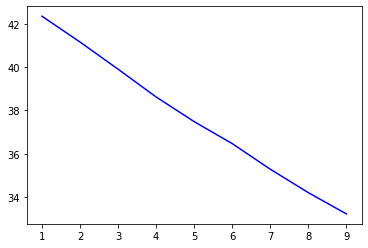

In [13]:
#USED HYPERPARAMETERS ARE:
#{'ngram_range': (0, 7), 'use_idf': True, 'df_min_max': (0.0, 0.7), 'norm': 'l2'}


y = labels
hyperparams = {'ngram_range': (0, 7), 'use_idf': True, 'df_min_max': (0.0, 0.7), 'norm': 'l2'}
vectorizer = TfidfVectorizer(ngram_range=hyperparams["ngram_range"],
                                 stop_words='english',
                                 use_idf=hyperparams["use_idf"],
                                 strip_accents='ascii',
                                 lowercase=True,
                                 max_df=hyperparams["df_min_max"][1],
                                 min_df=hyperparams["df_min_max"][0],
                                 norm=hyperparams["norm"],
                            )
X = vectorizer.fit_transform(news_processed_str)
X = np.array(X.toarray())
km = KMeans(n_clusters=5, max_iter=100, random_state=0)
km.fit(X)
y_pred = km.predict(X)
print("Homogeneity Score\t: %.3f" % homogeneity_score(y, y_pred))
print("V Score\t\t\t: %.3f" % v_measure_score(y, y_pred))
lim = 10
homo_scores = []
v_scores = []
wcss_errs = []
for n_clusters in range(1, lim): 
    km = KMeans(n_clusters=n_clusters, max_iter=100, random_state=0)
    km.fit(X)
    y_pred = km.predict(X)
    wcss_errs.append(km.inertia_)
    homo_scores.append(homogeneity_score(y, y_pred))
    v_scores.append(v_measure_score(y, y_pred))
plt.plot(range(1, lim), [x for x in wcss_errs], c='blue')
display(plt)